# Lezione 2019-03-21 \ 02

## Test di Pearson

Matteo Franzoi - 2019-03-21

---

In [2]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

os.getcwd()
data = pd.read_csv('PluviometriaPaperopoli_4.txt')
map(datetime,data['anno'])
data=data.set_index('anno')

In [3]:
data[-5:]

,1h,3h,6h,12h,24h
anno,,,,,
1984,61.2,61.4,61.4,62.6,81.8
1985,23.6,35.6,44.2,58.6,69.8
1986,20.2,36.8,51.4,55.8,74.4
1987,32.6,40.6,64.6,77.2,81.2
1988,89.2,102.0,102.0,102.0,104.2


from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title

In [5]:
best=pd.read_pickle("abs_mle")
best

,1h,3h,6h,12h,24h
a,31.59042,39.527315,48.100316,60.562103,75.848891
b,9.07316,10.041456,12.398915,18.005471,22.435148


Se il tempo di ritorno è di 10 anni, mi aspetto un quantile di 0.9
$$
qu = 1 - \frac{1}{T_r}
$$.  
Definisco la funzione _qtls_ che ha come input il dataframe (data) e il quantile.

In [7]:
def qtls(df,qu):
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])
    return rv1h.ppf(qu)

$$
qu = e^{-e^{-\frac{h-a}{b}}}
$$

Il logaritmo

$$
-\log qu = e^{-\frac{h-a}{b}}
$$

Ancora logaritmo

$$
\log (-\log qu) = - \frac{h-a}{b}
$$

$$
h-a = -b\,\log(-\log qu)
$$

L'inversa della curva di Gumbel è
$$
h = a -b\,\log(-\log qu)
$$

Implementandola

In [9]:
def h_g(bs,col,tr):
    return bs[col]["a"]+bs[col]["b"]*(-math.log(-math.log(1-1/tr)))

Calcolo i valori di _h_ con $T_r = 10\,anni$ e per ogni durata

In [10]:
[qtls(best["1h"],0.9),qtls(best["3h"],0.9),qtls(best["6h"],0.9),qtls(best["12h"],0.9),
 qtls(best["24h"],0.9)]

[52.00836207310437,
 62.12427880206336,
 76.00242956133329,
 101.08102667450524,
 126.33621400150082]

Generalizzando in una unica operazione, per 3 tempi di ritorno, e salvando in un dataframe il tutto

In [11]:
Tr=10
q10=1-1/Tr
q20=1-1/20
q100=1-1/100

    
def qtls(df,qu):
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])
    return rv1h.ppf(qu)

pts=DataFrame([[qtls(best["1h"],q10),
           qtls(best["3h"],q10),
           qtls(best["6h"],q10),
           qtls(best["12h"],q10),
           qtls(best["24h"],q10)],
          [qtls(best["1h"],q20),
           qtls(best["3h"],q20),
           qtls(best["6h"],q20),
           qtls(best["12h"],q20),
           qtls(best["24h"],q20)],
          [qtls(best["1h"],q100),
           qtls(best["3h"],q100),
           qtls(best["6h"],q100),
           qtls(best["12h"],q100),
           qtls(best["24h"],q100)]], index=[10,20,100],columns=[1,3,6,12,24]).T
pts

,10,20,100
1,52.008362,58.539476,73.328309
3,62.124279,69.352399,85.719510
6,76.002430,84.927515,105.137176
12,101.081027,114.041867,143.389956
24,126.336214,142.485660,179.053918


si ottengono i valori per ogni tempo di ritorno e per ogni durata.

Plottiamo i soli punti del DataFrame **pts**

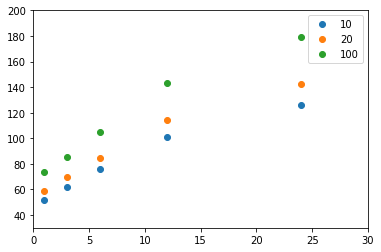

In [14]:
ag=pts.plot(style="o")
plt.xlim([0,30])
plt.ylim([30,200])
plt.show()

E aggiungiamo le linee

(30, 200)

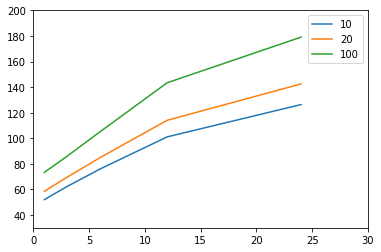

In [17]:
pts.plot(style="-")
plt.xlim([0,30])
plt.ylim([30,200])

In un grafico **bi-logaritmico**

(50, 200)

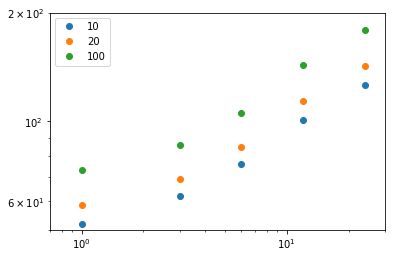

In [19]:
ag=pts.plot(style="o")
#plt.get_xaxis().get_major_formatter().set_scientific(False)
#plt.get_yaxis().get_major_formatter().set_scientific(False)
ag.set_yscale('log')
ag.set_xscale('log')
plt.xlim([0.7,30])
plt.ylim([50,200])

Usiamo l'interpolazione _polyfit_

In [20]:
f=[1,2,3,4]
g=[1,2,3,4]
np.polyfit(f,g,1)

array([1.00000000e+00, 1.11022302e-15])